In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 05/26/25 13:42:45


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [3]:
# Reading the date fild into the dataframe
# The default seperator is
df = pd.read_csv("https://raw.githubusercontent.com/vjavaly/Baruch-CIS-3920/refs/heads/main/data/airline_passenger_satisfaction_100K.csv")
pd.set_option('display.max_columns', None)

In [4]:
# Displays the shape of the dataframe
df.shape

(100000, 25)

In [5]:
# Listing all the columns
df.columns

Index(['trip_id', 'passenger_id', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Inflight WiFi',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
# Display a sample of 10 rows from the dataframe
df.sample(10)

,trip_id,passenger_id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight WiFi,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
93494,3009480,568497,Male,disloyal Customer,24.0,Business travel,Eco,1096.0,Good,Neutral,Neutral,Convenient,Poor,Average,Uncomfortable,Poor,Average,Good,4,Average,Average,1,0.0,0.0,neutral or dissatisfied
64362,8566814,221032,Male,Loyal Customer,44.0,Personal Travel,Eco,748.0,Good,Convenient,Neutral,Convenient,Average,Average,Neutral,Neutral,Average,Good,4,Good,Good,3,0.0,0.0,neutral or dissatisfied
57377,8608066,483172,Female,Loyal Customer,27.0,Business travel,Business,147.0,Excellent,Neutral,Easy,Convenient,Good,Good,Comfortable,Good,Average,Average,2,Average,Good,4,0.0,0.0,satisfied
6179,2223567,186993,Male,Loyal Customer,55.0,Personal Travel,Eco,547.0,Excellent,Inconvenient,Easy,Neutral,Good,Good,Comfortable,Good,Average,Average,5,Good,Good,4,0.0,0.0,neutral or dissatisfied
33130,4833726,316519,Male,Loyal Customer,37.0,Business travel,Business,2630.0,Good,Neutral,Neutral,Neutral,Average,Average,Neutral,Neutral,Average,Average,2,Good,Average,4,0.0,0.0,neutral or dissatisfied
67087,7013059,407870,Female,Loyal Customer,30.0,Personal Travel,Eco,1814.0,Excellent,Neutral,Easy,Inconvenient,Good,Good,Comfortable,Good,Average,Good,4,Poor,Average,4,0.0,0.0,neutral or dissatisfied
58560,3500459,294829,Female,Loyal Customer,60.0,Personal Travel,Eco,628.0,Good,Inconvenient,Neutral,Neutral,Average,Average,Neutral,Good,Good,Average,4,Poor,Good,2,16.0,4.0,neutral or dissatisfied
34451,3544022,532986,Female,Loyal Customer,33.0,Personal Travel,Eco,449.0,Good,Neutral,Neutral,Neutral,Average,Average,Neutral,Neutral,Average,Average,4,Average,Good,2,64.0,84.0,neutral or dissatisfied
32370,3378004,467378,Male,Loyal Customer,40.0,Business travel,Business,1542.0,Good,Neutral,Easy,Convenient,Average,Average,Comfortable,Neutral,Average,Poor,2,Average,Average,4,0.0,0.0,neutral or dissatisfied
41699,6454484,824743,Female,Loyal Customer,8.0,Personal Travel,Eco Plus,965.0,Good,Convenient,Neutral,Inconvenient,NaN,Average,Neutral,Good,Good,Good,5,Average,Good,4,34.0,35.0,neutral or dissatisfied


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_id,100000.0,4.999477e+06,2.310205e+06,1000039.0,2997614.50,5004083.0,7001390.0,8999570.0
passenger_id,100000.0,4.992850e+05,2.305950e+05,100000.0,299844.25,498312.0,698853.5,899975.0
Age,99310.0,3.791905e+01,1.616985e+01,7.0,25.00,37.0,50.0,85.0
Flight Distance,99820.0,9.817266e+02,8.435440e+02,31.0,383.00,689.0,1235.0,4983.0
Baggage handling,100000.0,3.422490e+00,1.184503e+00,1.0,3.00,4.0,4.0,5.0
Cleanliness,100000.0,3.010740e+00,1.331016e+00,0.0,2.00,3.0,4.0,5.0
Departure Delay in Minutes,99762.0,1.600116e+01,4.008907e+01,0.0,0.00,0.0,14.0,1592.0
Arrival Delay in Minutes,99698.0,1.657830e+01,4.051119e+01,0.0,0.00,0.0,16.0,1584.0


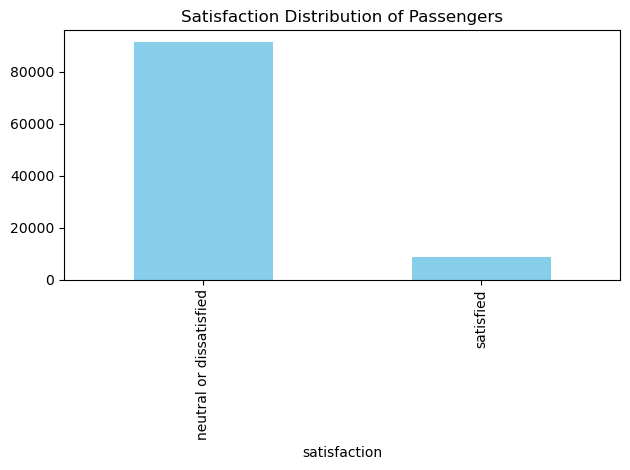

In [8]:
# Display bar chart of class distribution
df['satisfaction'].value_counts().sort_index().plot(kind='bar', color='skyblue', title='Satisfaction Distribution of Passengers').figure.tight_layout()

In [9]:
unique_counts = df.nunique()
print(unique_counts)

trip_id                              99971
passenger_id                         99971
Gender                                   2
Customer Type                            2
Age                                     75
Type of Travel                           2
Class                                    3
Flight Distance                       3505
Inflight WiFi                            3
Departure/Arrival time convenient        3
Ease of Online booking                   3
Gate location                            3
Food and drink                           3
Online boarding                          3
Seat comfort                             3
Inflight entertainment                   3
On-board service                         3
Leg room                                 3
Baggage handling                         5
Checkin service                          3
Inflight service                         3
Cleanliness                              6
Departure Delay in Minutes             389
Arrival Del

In [10]:
# Identifying duplicates in the DataFrame

df[df.duplicated()]

,trip_id,passenger_id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight WiFi,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
14298,3125021,108296,Male,disloyal Customer,38.0,Business travel,Business,148.0,Good,Neutral,Neutral,Neutral,Average,Average,Neutral,Neutral,Average,Good,5,Average,Good,2,20.0,13.0,neutral or dissatisfied
32634,2953000,779346,Male,Loyal Customer,22.0,Personal Travel,Eco,239.0,Good,Neutral,Difficult,Neutral,Average,Bad,Neutral,Neutral,Good,Average,3,Average,Average,2,0.0,0.0,neutral or dissatisfied
34995,1401244,168438,Female,Loyal Customer,22.0,Business travel,Eco,912.0,Excellent,Inconvenient,Easy,Convenient,Good,Good,Neutral,Good,Average,Average,4,Poor,Good,4,0.0,7.0,neutral or dissatisfied
40739,3578626,415213,Female,Loyal Customer,38.0,Personal Travel,Eco,1972.0,Poor,Neutral,Difficult,Neutral,Poor,Bad,Uncomfortable,NaN,Good,Poor,2,Good,Average,1,0.0,9.0,neutral or dissatisfied
42543,2628166,610784,Female,Loyal Customer,68.0,Personal Travel,Eco,429.0,Excellent,Convenient,Easy,Neutral,Average,Good,Comfortable,Good,Good,Good,5,Average,Good,5,0.0,0.0,neutral or dissatisfied
43911,2955139,369634,Male,disloyal Customer,27.0,Business travel,Business,2125.0,Good,Neutral,Neutral,Neutral,Good,Average,Comfortable,Good,Average,Good,3,Average,Good,5,0.0,0.0,neutral or dissatisfied
54930,4571938,877203,Female,Loyal Customer,67.0,Personal Travel,Eco,2845.0,Poor,Inconvenient,Difficult,Neutral,Good,Average,Uncomfortable,Poor,Poor,Poor,4,Poor,Poor,5,0.0,0.0,neutral or dissatisfied
62770,7230216,507126,Male,disloyal Customer,23.0,Business travel,Eco,1244.0,Good,Neutral,Neutral,Convenient,Poor,Average,Uncomfortable,Poor,Average,Good,4,Good,Good,1,6.0,1.0,neutral or dissatisfied
64638,1572749,872544,Male,Loyal Customer,33.0,Business travel,Business,1630.0,Good,Neutral,Neutral,Neutral,Average,Average,Neutral,Neutral,Average,Average,3,Poor,Average,2,0.0,2.0,neutral or dissatisfied
69096,1147964,281789,Female,Loyal Customer,49.0,Business travel,Eco,NaN,Good,Inconvenient,Difficult,Inconvenient,Average,Average,Neutral,Neutral,Average,Average,3,Good,Average,2,14.0,29.0,neutral or dissatisfied


In [11]:
# Dropping the duplicates in the dataframe
df.drop_duplicates()

,trip_id,passenger_id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight WiFi,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,5438431,139868,Male,Loyal Customer,38.0,Personal Travel,Eco,634.0,Good,Convenient,Neutral,Neutral,Good,Average,Neutral,Good,Good,Average,5,Average,Good,4,0.0,0.0,neutral or dissatisfied
1,7051759,218745,Male,Loyal Customer,63.0,Business travel,Eco Plus,115.0,Excellent,Inconvenient,Difficult,Inconvenient,Good,Good,Comfortable,Good,Good,Good,4,Good,Good,4,0.0,2.0,satisfied
2,4894365,873222,Male,disloyal Customer,27.0,Business travel,Eco,719.0,Good,Neutral,Neutral,Neutral,Good,Average,Comfortable,Good,Average,Average,2,Average,Average,4,1.0,9.0,neutral or dissatisfied
3,2443272,249550,Male,disloyal Customer,41.0,Business travel,Eco Plus,591.0,Poor,Inconvenient,Difficult,Neutral,Poor,Good,Comfortable,Neutral,Average,Average,3,Good,Poor,5,306.0,295.0,neutral or dissatisfied
4,3603635,128206,Female,Loyal Customer,48.0,Business travel,Business,3358.0,Excellent,Neutral,Easy,Convenient,Good,Average,Comfortable,Good,Good,Good,5,Average,Good,3,112.0,130.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3770674,844223,Female,Loyal Customer,67.0,Personal Travel,Eco Plus,429.0,Good,Neutral,Neutral,Neutral,Average,Average,Neutral,Neutral,Average,Average,3,Good,Average,1,120.0,113.0,neutral or dissatisfied
99996,5602314,369962,Female,Loyal Customer,63.0,Personal Travel,Eco,1190.0,Good,Convenient,Neutral,Inconvenient,Good,Good,Comfortable,Neutral,Average,Average,3,Good,Average,4,32.0,16.0,neutral or dissatisfied
99997,4985496,398298,Male,Loyal Customer,41.0,Business travel,Eco Plus,964.0,Poor,Neutral,Neutral,Neutral,Poor,Bad,NaN,Poor,Average,Good,4,Poor,Average,1,14.0,0.0,neutral or dissatisfied
99998,8331068,309876,Female,Loyal Customer,54.0,Personal Travel,Eco,1126.0,Poor,Neutral,Difficult,Neutral,Average,Good,Comfortable,Good,Good,Poor,4,Good,Good,5,0.0,0.0,neutral or dissatisfied


In [12]:
df.drop(columns=["trip_id","passenger_id"], inplace=True)

In [13]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [14]:
# Check for missing values
df.isnull().sum()

Gender                               2386
Customer Type                           0
Age                                   690
Type of Travel                          0
Class                                   0
Flight Distance                       180
Inflight WiFi                         555
Departure/Arrival time convenient       0
Ease of Online booking                  0
Gate location                           0
Food and drink                       1056
Online boarding                         0
Seat comfort                          401
Inflight entertainment                170
On-board service                      228
Leg room                              133
Baggage handling                        0
Checkin service                         0
Inflight service                      132
Cleanliness                             0
Departure Delay in Minutes            238
Arrival Delay in Minutes              302
satisfaction                            0
dtype: int64

In [15]:
columns_numerical = ["Age","Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"]
columns_non_numerical= ["Gender", "Inflight WiFi", "Food and drink", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room", "Inflight service"]

In [16]:
df[columns_numerical] = imp_mean.fit_transform(df[columns_numerical])
df[columns_non_numerical] = imp_mode.fit_transform(df[columns_non_numerical])

In [17]:
# Re-check for missing values
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight WiFi                        0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room                             0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [18]:
print(df["Class"].unique())
print(df["Ease of Online booking"].unique())
print(df["On-board service"].unique())
print(df["Leg room"].unique())
print(df["Inflight WiFi"].unique())
print(df["Gate location"].unique())
print(df["Inflight entertainment"].unique())
print(df["Departure/Arrival time convenient"].unique())
print(df["Inflight service"].unique())
print(df["Checkin service"].unique())
print(df["Food and drink"].unique())
print(df["Online boarding"].unique())
print(df["Seat comfort"].unique())

['Eco' 'Eco Plus' 'Business']
['Neutral' 'Difficult' 'Easy']
['Good' 'Average' 'Poor']
['Average' 'Good' 'Poor']
['Good' 'Excellent' 'Poor']
['Neutral' 'Inconvenient' 'Convenient']
['Good' 'Neutral' 'Poor']
['Convenient' 'Inconvenient' 'Neutral']
['Good' 'Average' 'Poor']
['Average' 'Good' 'Poor']
['Good' 'Poor' 'Average']
['Average' 'Good' 'Bad']
['Neutral' 'Comfortable' 'Uncomfortable']


In [19]:
CATEGORIES = [['Eco', 'Eco Plus', 'Business'], ['Neutral', 'Difficult', 'Easy'], ['Poor', 'Average', 'Good'], ['Poor', 'Average', 'Good'], ['Poor', 'Good', 'Excellent'], ['Inconvenient', 'Neutral', 'Convenient'], ['Poor','Neutral','Good'], ['Inconvenient', 'Neutral', 'Convenient'], ["Poor","Average", "Good"], ["Poor","Average", "Good"], ["Poor","Average", "Good"], ['Bad','Average','Good'], ['Uncomfortable','Neutral','Comfortable']]

# Initialize the OrdinalEncoder
oe = OrdinalEncoder(categories=CATEGORIES)

# Generate encodings
df[['Class', 'Ease of Online booking', "On-board service", "Leg room", "Inflight WiFi", "Gate location", "Inflight entertainment", "Departure/Arrival time convenient", "Inflight service", "Checkin service", "Food and drink", "Online boarding", "Seat comfort"]] = oe.fit_transform(df[['Class', 'Ease of Online booking', "On-board service", "Leg room", 'Inflight WiFi', "Gate location", "Inflight entertainment", "Departure/Arrival time convenient", "Inflight service", "Checkin service", "Food and drink", "Online boarding", "Seat comfort"]])
#
df.sample(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight WiFi,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
46067,Female,Loyal Customer,48.0,Business travel,1.0,221.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2,2.0,1.0,2,0.0,4.0,neutral or dissatisfied
9313,Female,Loyal Customer,23.0,Business travel,0.0,1532.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,4,1.0,1.0,4,0.0,0.0,neutral or dissatisfied
74522,Female,Loyal Customer,37.0,Personal Travel,0.0,926.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,2.0,5,2.0,2.0,1,0.0,2.0,neutral or dissatisfied
1488,Female,Loyal Customer,39.0,Business travel,2.0,624.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2,1.0,1.0,2,26.0,33.0,neutral or dissatisfied
37865,Male,Loyal Customer,52.0,Business travel,1.0,721.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,3,0.0,1.0,3,1.0,0.0,neutral or dissatisfied
15462,Male,Loyal Customer,57.0,Personal Travel,0.0,383.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0,4,2.0,2.0,5,1.0,0.0,neutral or dissatisfied
61774,Female,Loyal Customer,27.0,Personal Travel,1.0,1024.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,2.0,1.0,0.0,2,2.0,1.0,5,0.0,0.0,neutral or dissatisfied
82973,Female,disloyal Customer,27.0,Business travel,0.0,995.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,0.0,3,0.0,2.0,5,0.0,0.0,neutral or dissatisfied
87058,Female,Loyal Customer,51.0,Personal Travel,0.0,1235.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,2.0,1.0,3,14.0,6.0,neutral or dissatisfied
70989,Female,Loyal Customer,31.0,Business travel,2.0,216.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,2.0,2.0,4,2.0,2.0,3,0.0,0.0,neutral or dissatisfied


In [20]:
df = pd.get_dummies(df, columns=['Gender', 'Customer Type', "Type of Travel" ], drop_first=True, dtype=int,)
df.sample(10)

,Age,Class,Flight Distance,Inflight WiFi,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
88136,28.0,2.0,3630.0,2.0,0.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,4,1.0,1.0,4,0.0,6.0,neutral or dissatisfied,1,0,0
24544,31.0,2.0,1947.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,4,1.0,2.0,5,0.0,17.0,satisfied,1,0,0
24664,23.0,0.0,160.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,5,2.0,2.0,4,0.0,0.0,neutral or dissatisfied,1,1,0
20306,26.0,2.0,363.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,2.0,5,2.0,2.0,4,22.0,72.0,satisfied,0,1,0
3144,22.0,0.0,370.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4,0.0,2.0,3,0.0,16.0,neutral or dissatisfied,0,0,0
19228,14.0,1.0,516.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3,0.0,1.0,3,12.0,51.0,neutral or dissatisfied,0,0,0
85467,23.0,0.0,689.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,4,1.0,2.0,3,7.0,14.0,neutral or dissatisfied,1,1,0
13206,40.0,2.0,1846.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,3,2.0,1.0,2,0.0,14.0,neutral or dissatisfied,1,0,0
55367,60.0,0.0,157.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,4,2.0,1.0,3,4.0,0.0,neutral or dissatisfied,1,0,1
14657,67.0,0.0,1670.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3,1.0,1.0,4,8.0,5.0,neutral or dissatisfied,1,0,1


In [21]:
le = LabelEncoder()
df['satisfaction']= le.fit_transform(df['satisfaction'])
df.sample(10)

,Age,Class,Flight Distance,Inflight WiFi,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
73065,50.0,2.0,1547.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,1.0,1.0,5,2.0,2.0,4,0.0,0.0,0,0,1,0
96384,9.0,0.0,647.0,1.0,2.0,0.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,3,2.0,1.0,4,20.0,9.0,0,1,0,1
26808,55.0,0.0,1128.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,2,2.0,1.0,4,0.0,24.0,0,0,0,1
80686,16.0,2.0,1948.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3,2.0,1.0,3,0.0,0.0,1,1,0,0
87393,40.0,2.0,2300.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,3,1.0,1.0,2,0.0,0.0,0,0,0,0
98008,44.0,0.0,476.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,3,2.0,1.0,3,112.0,114.0,0,1,0,1
92036,23.0,0.0,867.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,4,1.0,1.0,1,0.0,0.0,0,1,0,0
8835,41.0,2.0,550.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,3,0.0,25.0,0,0,0,0
1495,72.0,2.0,920.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,4,1.0,2.0,4,0.0,53.0,0,0,0,0
25615,61.0,0.0,110.0,1.0,0.0,0.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,3,1.0,1.0,5,0.0,0.0,0,1,0,1


In [22]:
X = df.drop(columns="satisfaction", axis = 1)
y = df["satisfaction"]

In [23]:
# Instantiate StandardScalar
scaler = StandardScaler()

# Scale the independent variables
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [24]:
sm = SMOTE(sampling_strategy=0.3)
X_sm, y_sm = sm.fit_resample(X_scaled, y)


In [25]:
# Displaying a sample of 5 rows of the final set of independent variables used for model training
# Convert X_sm to a Pandas DataFrame before calling sample()
X_sm_df = pd.DataFrame(X_sm, columns=X.columns)  # Assuming X is the original DataFrame with column names
X_sm_df.sample(5)

,Age,Class,Flight Distance,Inflight WiFi,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
100866,0.869834,1.456480,2.040599,0.042694,-0.047664,-0.824684,-0.293638,-0.311186,1.311161,1.015608,1.107702,1.047604,1.087944,1.331798,1.035115,0.846114,-0.008069,-0.118155,0.040229,-0.951190,-0.549405,-0.919656
50846,-0.987909,-0.763781,-0.067309,1.698778,1.530092,1.578592,-0.293638,-0.311186,1.311161,-0.397215,-0.296336,1.047604,1.087944,1.331798,-0.365355,0.846114,-0.759379,-0.399618,-0.409849,-0.951190,-0.549405,1.087363
26897,-1.918783,-0.763781,-0.111211,0.042694,1.530092,-0.824684,-0.293638,1.106390,-0.199672,1.015608,1.107702,1.047604,-0.381754,0.487557,1.035115,0.846114,1.494551,-0.399618,-0.310961,-0.951190,-0.549405,1.087363
10861,1.742656,-0.763781,0.540204,-1.613391,-1.625419,0.376954,-0.293638,-1.728762,-0.199672,-0.397215,-0.296336,-0.372183,-1.851453,-1.200924,-0.365355,-0.710645,-1.510689,0.924021,0.579032,-0.951190,-0.549405,1.087363
21485,-0.553501,-0.763781,-1.039092,0.042694,-1.625419,-0.824684,1.163407,1.106390,-0.199672,1.015608,1.107702,1.047604,1.087944,-0.356683,1.035115,0.846114,1.494551,-0.399618,-0.409849,1.051315,1.820150,-0.919656


In [26]:
# Display a sample of 5 rows from the final dependent variable used for model training
y.sample(5)

68293    1
65185    1
97345    0
64993    0
95264    0
Name: satisfaction, dtype: int32

In [27]:
# Split data into training and test sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
                                                                stratify=y_sm,
                                                                test_size=0.25)


In [28]:
# Display model (default) hyperparameters
model = LogisticRegression()
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [29]:
# Parameter grid
param_dist = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300],
    'fit_intercept': [True, False]
}

# RandomizedSearchCV 
rs = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=6,         
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

# Fit the search
rs.fit(X_train_sm, y_train_sm)

# Evaluate
best_logreg_model = rs.best_estimator_
accuracy = best_logreg_model.score(X_test_sm, y_test_sm)

print(f"Best Parameters: {rs.best_params_}")
print(f"Model Score: {round(accuracy * 100, 2)}%")


Best Parameters: {'solver': 'liblinear', 'max_iter': 200, 'fit_intercept': True, 'C': 0.01}
Model Score: 90.99%


In [30]:
# Predict using the test set
y_pred_sm = best_logreg_model.predict(X_test_sm)

In [31]:
# Display model accuracy score
accuracy = best_logreg_model.score(X_test_sm, y_test_sm)
print("accuracy =", round((accuracy * 100), 2), "%")

accuracy = 90.99 %


In [32]:
# Display classification report
print(classification_report(y_test_sm, y_pred_sm))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     22853
           1       0.83      0.77      0.80      6856

    accuracy                           0.91     29709
   macro avg       0.88      0.86      0.87     29709
weighted avg       0.91      0.91      0.91     29709



In [33]:
# Generate confusion matrix
cm = confusion_matrix(y_test_sm, y_pred_sm)
cm

array([[21760,  1093],
       [ 1583,  5273]], dtype=int64)

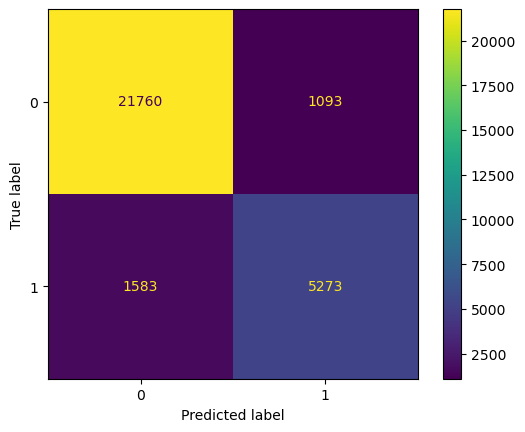

In [34]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_logreg_model.classes_)
disp.plot()
plt.show()

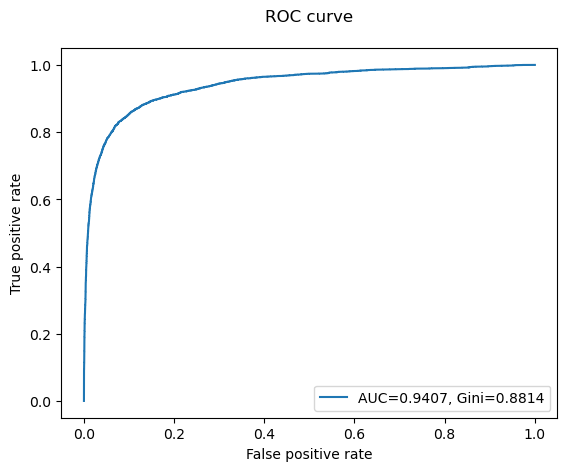

In [35]:
# Display ROC Curve
y_pred_sm_proba = best_logreg_model.predict_proba(X_test_sm)[::,1]
fpr, tpr, _ = roc_curve(y_test_sm, y_pred_sm_proba)
auc = round(roc_auc_score(y_test_sm, y_pred_sm_proba),4)
gini = round(((auc * 2) - 1),4)
label_string = f'AUC={auc}, Gini={gini}'
plt.plot(fpr, tpr, label=label_string)
plt.legend(loc=4)
plt.title('ROC curve', y=1.05)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [36]:
# Extract feature names
labels = list(X.columns)
labels

['Age',
 'Class',
 'Flight Distance',
 'Inflight WiFi',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Gender_Male',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel']

In [37]:
coeff = list(best_logreg_model.coef_[0])
coeff

[-0.04101941128119551,
 0.35205512959045226,
 0.00955503402156199,
 0.4251970430926324,
 -0.15771231369390445,
 0.3061167521270967,
 -0.1390235902126116,
 -0.011932475820400397,
 0.7137441577956432,
 0.20563888243046477,
 -0.09798035689429384,
 0.3944309339458773,
 0.37532862632799385,
 0.34175737336011125,
 0.37062710906047386,
 0.22720034376522,
 0.48664605048423154,
 -0.009572097169020754,
 -0.21896087918771254,
 0.04906168584301864,
 -0.9315250812190172,
 -1.392600604299665]

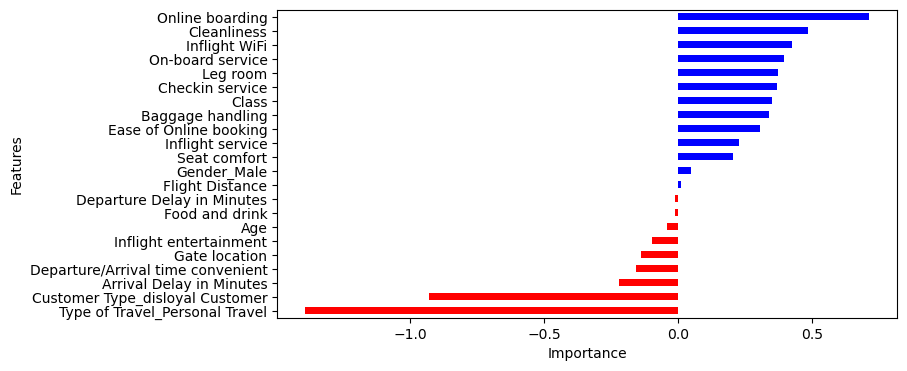

In [38]:
# Visualize how the model uses different features and which features have greater effect
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(8, 4),
                         color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')
plt.show()

In [39]:
model_2 = KNeighborsClassifier()
model_2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [40]:


#Define parameter grid 
param_dist = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto'],
}

#Setup RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=model_2,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=2,
    n_jobs=1,        
    verbose=1,)


# Step 4: Fit and evaluate
rs.fit(X_train_sm, y_train_sm)
best_knn_model = rs.best_estimator_
accuracy = best_knn_model.score(X_test_sm, y_test_sm)

print(f"Best Parameters: {rs.best_params_}")
print(f"Model Score: {round(accuracy * 100, 2)}%")


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'algorithm': 'auto'}
Model Score: 98.9%


In [41]:
# Predict using the test set
y_pred_sm = best_knn_model.predict(X_test_sm)
y_pred_sm

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
accuracy = best_knn_model.score(X_test_sm, y_test_sm)
print("accuracy =", round((accuracy * 100), 2), "%")

accuracy = 98.9 %


In [43]:
print(classification_report(y_test_sm, y_pred_sm))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22853
           1       0.97      0.99      0.98      6856

    accuracy                           0.99     29709
   macro avg       0.98      0.99      0.98     29709
weighted avg       0.99      0.99      0.99     29709



In [44]:
cm = confusion_matrix(y_test_sm, y_pred_sm)
cm

array([[22619,   234],
       [   93,  6763]], dtype=int64)

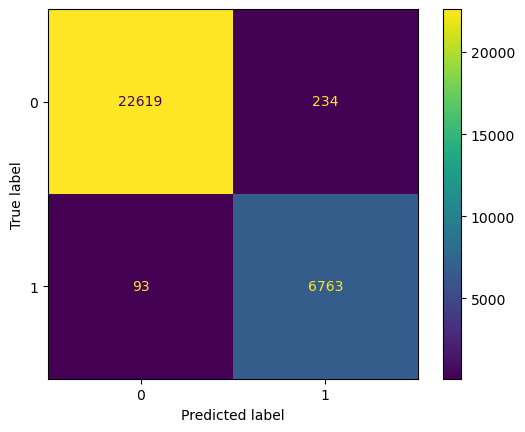

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_knn_model.classes_)
disp.plot()
plt.show()

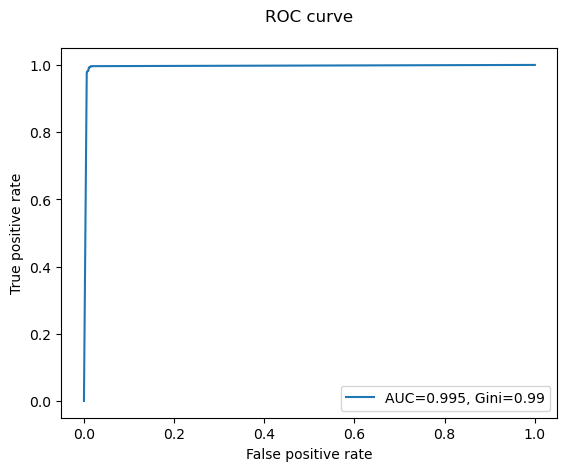

In [46]:
y_pred_sm_proba = best_knn_model.predict_proba(X_test_sm)[::,1]
fpr, tpr, _ = roc_curve(y_test_sm, y_pred_sm_proba)
auc = round(roc_auc_score(y_test_sm, y_pred_sm_proba),4)
gini = round(((auc * 2) - 1),4)
label_string = f'AUC={auc}, Gini={gini}'
plt.plot(fpr, tpr, label=label_string)
plt.legend(loc=4)
plt.title('ROC curve', y=1.05)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [47]:
model_3=RandomForestClassifier()
model_3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [48]:
# Simple parameter distribution
param_dist = {
    'n_estimators': randint(50, 100),
    'max_depth': [None, 10, 20],
}

# RandomizedSearchCV setup
rs = RandomizedSearchCV(
    model_3,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit to training data
rs.fit(X_train_sm, y_train_sm)

# Print best parameters
print(rs.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'max_depth': None, 'n_estimators': 75}


In [49]:
best_rf_model = rs.best_estimator_
best_rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 75,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [50]:
# Use best model to make predictions on the test set
y_pred_sm = best_rf_model.predict(X_test_sm)

In [51]:
# Print best model accuracy score
best_random_search_accuracy = round((best_rf_model.score(X_test_sm, y_test_sm) * 100), 3)
print(f"Best model after random search accuracy = {best_random_search_accuracy}%")

Best model after random search accuracy = 99.162%


In [52]:
# Display classification report
print(classification_report(y_test_sm, y_pred_sm))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22853
           1       0.99      0.97      0.98      6856

    accuracy                           0.99     29709
   macro avg       0.99      0.98      0.99     29709
weighted avg       0.99      0.99      0.99     29709



In [53]:
cm = confusion_matrix(y_test_sm, y_pred_sm)
cm

array([[22810,    43],
       [  206,  6650]], dtype=int64)

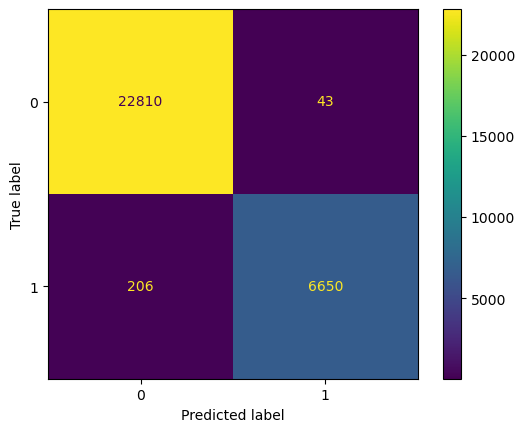

In [54]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_rf_model.classes_)
disp.plot()
plt.show()

In [55]:
feature_names = X.columns
feature_names

Index(['Age', 'Class', 'Flight Distance', 'Inflight WiFi',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel'],
      dtype='object')

In [56]:
feature_importances = best_rf_model.feature_importances_
feature_importances

array([0.0502177 , 0.12590813, 0.04664254, 0.07643315, 0.01510621,
       0.01893022, 0.02565639, 0.01339757, 0.15447693, 0.04348325,
       0.04309197, 0.03839642, 0.04474905, 0.0455272 , 0.02489962,
       0.01972915, 0.04827199, 0.01901549, 0.02090088, 0.00812257,
       0.04065162, 0.07639195])

In [57]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

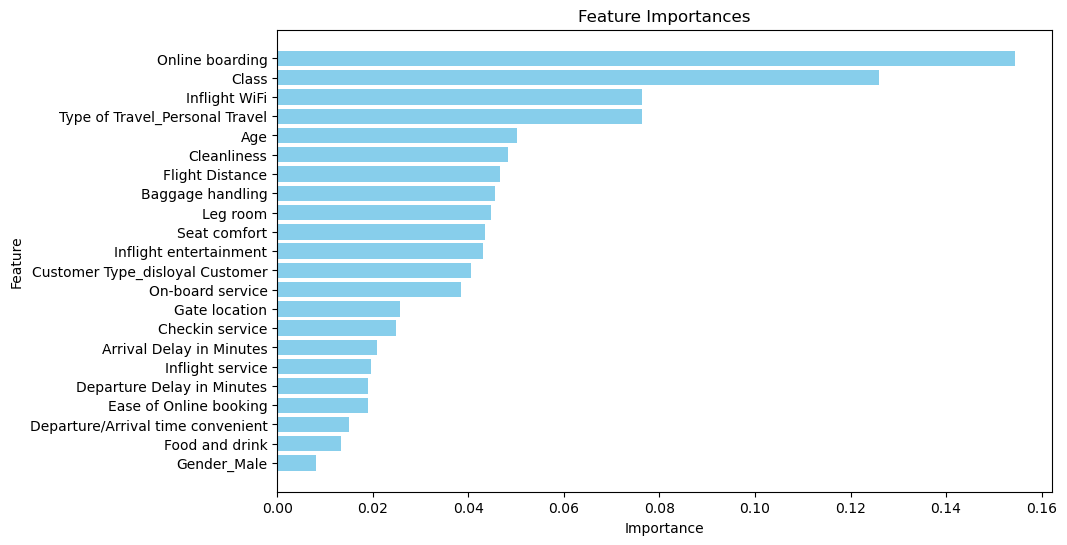

In [58]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert to show the most important feature at the top
plt.show()

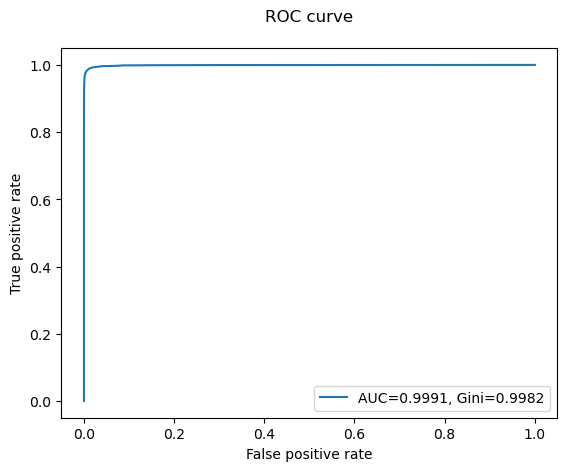

In [59]:
y_pred_sm_proba = best_rf_model.predict_proba(X_test_sm)[::,1]
fpr, tpr, _ = roc_curve(y_test_sm, y_pred_sm_proba)
auc = round(roc_auc_score(y_test_sm, y_pred_sm_proba),4)
gini = round(((auc * 2) - 1),4)
label_string = f'AUC={auc}, Gini={gini}'
plt.plot(fpr, tpr, label=label_string)
plt.legend(loc=4)
plt.title('ROC curve', y=1.05)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [60]:
# Step 1: Define the model
model_4 = LinearSVC(dual=False)

# Step 2: Define parameter distribution
param_dist = {
    'C': [0.01, 0.1, 1, 5, 10],      
    'max_iter': [1000, 2000, 3000, 5000, 10000], 
}

# Step 3: Randomized search setup
rs = RandomizedSearchCV(
    estimator=model_4,
    param_distributions=param_dist,
    n_iter=10,          # Try 10 combinations
    scoring='accuracy', 
    cv=5,               # 5-fold cross-validation
    n_jobs=-1           # Use all cores
)

# Step 4: Fit the search
rs.fit(X_train_sm, y_train_sm)

# Step 5: Evaluate best model
best_svc_model = rs.best_estimator_
accuracy = best_svc_model.score(X_test_sm, y_test_sm)

print(f"Best Parameters: {rs.best_params_}")
print(f"Model Score: {round(accuracy * 100, 2)}%")


Best Parameters: {'max_iter': 2000, 'C': 10}
Model Score: 91.07%


In [61]:
y_pred_sm = best_svc_model.predict(X_test_sm)

In [62]:
best_model_search_accuracy = round((best_svc_model.score(X_test_sm, y_test_sm) * 100), 3)
print(f"Best model after random search accuracy = {best_model_search_accuracy}%")

Best model after random search accuracy = 91.073%


In [63]:
print(classification_report(y_test_sm, y_pred_sm))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     22853
           1       0.83      0.77      0.80      6856

    accuracy                           0.91     29709
   macro avg       0.88      0.86      0.87     29709
weighted avg       0.91      0.91      0.91     29709



In [64]:
cm = confusion_matrix(y_test_sm, y_pred_sm)
cm

array([[21784,  1069],
       [ 1583,  5273]], dtype=int64)

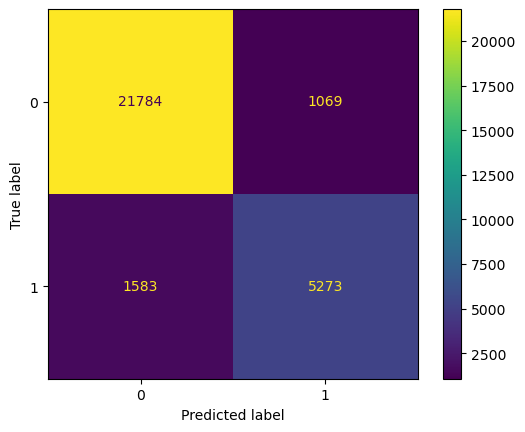

In [65]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_svc_model.classes_)
disp.plot()
plt.show()

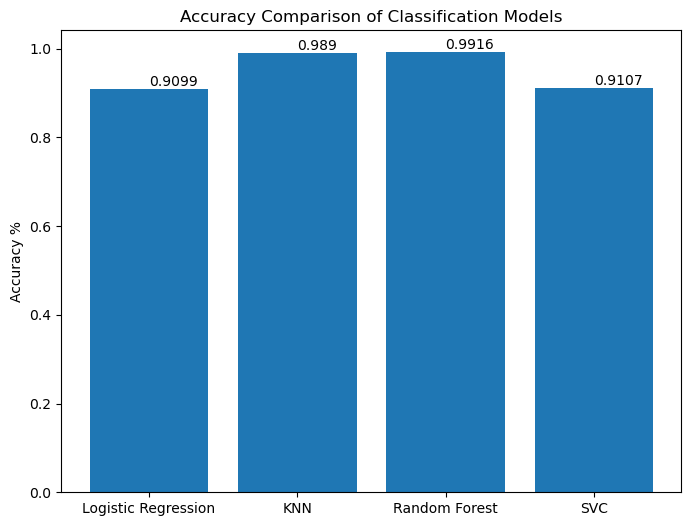

In [66]:
# Show accuracy comparison between all four models (bar chart with labels and accuracy %)
logreg_acc = best_logreg_model.score(X_test_sm, y_test_sm)
knn_acc = best_knn_model.score(X_test_sm, y_test_sm)
rf_acc = best_rf_model.score(X_test_sm, y_test_sm)
svc_acc = best_svc_model.score(X_test_sm, y_test_sm)

models = ['Logistic Regression', 'KNN', 'Random Forest', 'SVC']
accuracies = [logreg_acc, knn_acc, rf_acc, svc_acc]


# Create a figure and a set of subplots with a wider figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar chart
bars = plt.bar(models, accuracies)

# Set the title and labels
ax.set_title('Accuracy Comparison of Classification Models')
ax.set_ylabel('Accuracy %')

# Loop over the bars and add the accuracy score as text
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), va='bottom')

# Display the plot
plt.show()